In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import missingno as msno

In [5]:
df = pd.read_csv("data/bs_clean.csv")
df.head(10)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,M,M348934600,transportation,4.55,0
1,0,C352968107,2,M,M348934600,transportation,39.68,0
2,0,C2054744914,4,F,M1823072687,transportation,26.89,0
3,0,C1760612790,3,M,M348934600,transportation,17.25,0
4,0,C757503768,5,M,M348934600,transportation,35.72,0
5,0,C1315400589,3,F,M348934600,transportation,25.81,0
6,0,C765155274,1,F,M348934600,transportation,9.10,0
7,0,C202531238,4,F,M348934600,transportation,21.17,0
8,0,C105845174,3,M,M348934600,transportation,32.40,0
9,0,C39858251,5,F,M348934600,transportation,35.40,0


<AxesSubplot:>

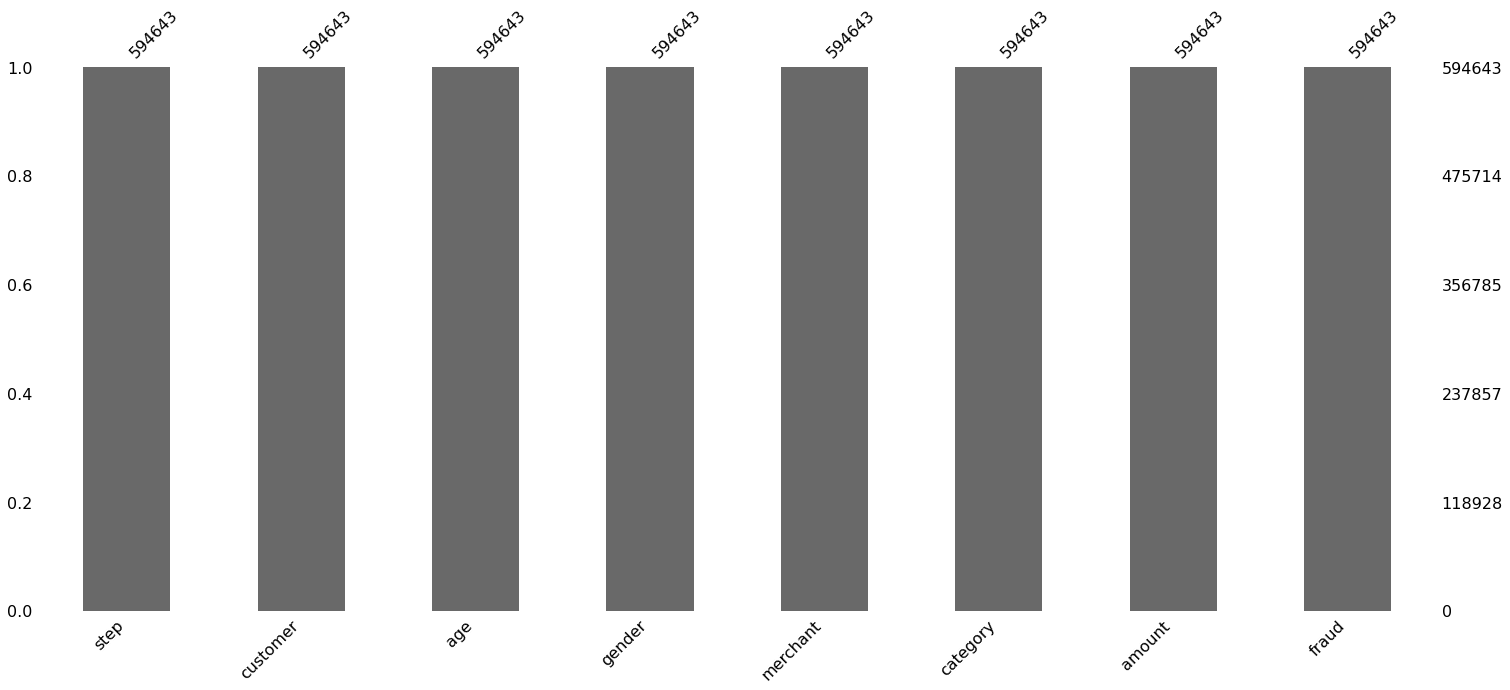

In [7]:
msno.bar(df)

In [33]:
Q1 = df.amount.quantile(0.25)
Q3 = df.amount.quantile(0.75)
IQR = Q3-Q1

#conditions = [(df.amount > (Q3+1.5*IQR)), (df.amount < (Q1-1.5*IQR)), (df.amount < (Q3+1.5*IQR)) | (df.amount > (Q1+1.5*IQR))]
conditions = [(df.amount > (Q3+1.5*IQR)), (df.amount < (Q3+1.5*IQR))]
#values = [1, 1, 0]
values = [1, 0]
df["IQR_outlier"] = np.select(conditions, values)
df.head()

,step,customer,age,gender,merchant,category,amount,fraud,IQR_outlier
0,0,C1093826151,4,M,M348934600,transportation,4.55,0,0
1,0,C352968107,2,M,M348934600,transportation,39.68,0,0
2,0,C2054744914,4,F,M1823072687,transportation,26.89,0,0
3,0,C1760612790,3,M,M348934600,transportation,17.25,0,0
4,0,C757503768,5,M,M348934600,transportation,35.72,0,0


In [34]:
lowerBound = Q1 - 1.5*IQR
upperBound = Q3 + 1.5*IQR
print("The lower outlier bound for amount is: ", lowerBound) # non-existant
print("The upper outlier bound for amount is: ", upperBound)

The lower outlier bound for amount is:  -29.459999999999994
The upper outlier bound for amount is:  85.74


In [35]:
df[df.amount > 85.74].shape

(25798, 9)

In [36]:
#sns.set(rc = {'figure.figsize':(15,8)})
#graph = sns.stripplot(data=df, x="step", y="amount", hue="fraud")
#graph.axhline(Q3 + 1.5*IQR, color = 'r')
#plt.xticks(np.arange(0, 180, 18))
#plt.show()
df.groupby("category").amount.mean()

category
barsandrestaurants      43.461014
content                 44.547571
fashion                 65.666642
food                    37.070405
health                 135.621367
home                   165.670846
hotelservices          205.614249
hyper                   45.970421
leisure                288.911303
otherservices          135.881524
sportsandtoy           215.715280
tech                   120.947937
transportation          26.958187
travel                2250.409190
wellnessandbeauty       65.511221
Name: amount, dtype: float64

In [37]:
mean = df["amount"].mean()
std = np.std(df["amount"])
print('mean of the dataset is', mean)
print('std. deviation is', std)

threshold = 1.5
outlier = []
for i in df["amount"]:
    z = (i-mean)/std
    if abs(z) > threshold:
        outlier.append(i)
print('The number of outliers in the dataset is', len(outlier))


mean of the dataset is 37.89013530807561
std. deviation is 111.40273725877348
The number of outliers in the dataset is 7341


In [38]:
categories = df.category.unique()

for cat in categories:
    print(cat)

transportation
health
otherservices
food
hotelservices
barsandrestaurants
tech
sportsandtoy
wellnessandbeauty
hyper
fashion
home
content
travel
leisure


In [39]:
#values are returning NaN for some reason

categories = df.category.unique()
stats = []

for cat in categories:
    result = {}
    result['category'] = cat
    cat_df = df[df['category'] == cat]
    
    cat_mean = cat_df['amount'].mean()
    result['mean'] = cat_mean

    cat_std = np.std(cat_df['amount'])
    result['std'] = cat_std
    
    threshold = 1.5
    outlier = []
    for i in cat_df["amount"]:
        cat_z = (i-cat_mean)/cat_std
        if abs(cat_z) > threshold:
            outlier.append(i)
        result['num_of_outliers'] = len(outlier)
    stats.append(result)
    
print(stats)


[{'category': 'transportation', 'mean': 26.958187001478866, 'std': 17.527860309506565, 'num_of_outliers': 48662}, {'category': 'health', 'mean': 135.6213667637761, 'std': 153.1560169711103, 'num_of_outliers': 887}, {'category': 'otherservices', 'mean': 135.881524122807, 'std': 158.53973184764058, 'num_of_outliers': 74}, {'category': 'food', 'mean': 37.07040489068333, 'std': 24.99849330783595, 'num_of_outliers': 2266}, {'category': 'hotelservices', 'mean': 205.614248853211, 'std': 225.4457247642073, 'num_of_outliers': 181}, {'category': 'barsandrestaurants', 'mean': 43.4610136513416, 'std': 38.400959515453344, 'num_of_outliers': 325}, {'category': 'tech', 'mean': 120.94793670886075, 'std': 127.01787707562144, 'num_of_outliers': 111}, {'category': 'sportsandtoy', 'mean': 215.71527986006998, 'std': 215.64543192606433, 'num_of_outliers': 429}, {'category': 'wellnessandbeauty', 'mean': 65.51122099960229, 'std': 65.40673775291049, 'num_of_outliers': 664}, {'category': 'hyper', 'mean': 45.970

In [40]:
df["z_score"] = (df.amount-mean)/std
conditions = [(df.z_score > 1.5), (df.z_score < (-1.5)), (df.z_score < (1.5)) | (df.z_score > (-1.5))]
values = [1, 1, 0]
df["Z_outlier"] = np.select(conditions, values)
df.head()

,step,customer,age,gender,merchant,category,amount,fraud,IQR_outlier,z_score,Z_outlier
0,0,C1093826151,4,M,M348934600,transportation,4.55,0,0,-0.299276,0
1,0,C352968107,2,M,M348934600,transportation,39.68,0,0,0.016067,0
2,0,C2054744914,4,F,M1823072687,transportation,26.89,0,0,-0.098742,0
3,0,C1760612790,3,M,M348934600,transportation,17.25,0,0,-0.185275,0
4,0,C757503768,5,M,M348934600,transportation,35.72,0,0,-0.019480,0


In [41]:
df.fraud.value_counts()
df.IQR_outlier.value_counts()
df.Z_outlier.value_counts()

0    587443
1      7200
Name: fraud, dtype: int64

0    568845
1     25798
Name: IQR_outlier, dtype: int64

0    587302
1      7341
Name: Z_outlier, dtype: int64

In [43]:
df.groupby("category").amount.describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
barsandrestaurants,6373.0,43.461014,38.403973,0.01,17.1700,36.270,61.4900,695.63
content,885.0,44.547571,33.155431,0.01,17.5000,38.430,65.2000,185.13
fashion,6454.0,65.666642,55.487908,0.01,26.6550,55.615,91.8175,773.61
food,26254.0,37.070405,24.998969,0.00,16.9625,33.475,53.5100,154.91
health,16133.0,135.621367,153.160764,0.03,45.3000,97.890,170.5500,1972.81
home,1986.0,165.670846,192.664019,0.13,53.6750,111.310,197.4975,1540.23
hotelservices,1744.0,205.614249,225.510387,0.02,64.5900,131.940,229.8950,1429.04
hyper,6098.0,45.970421,45.538458,0.02,17.9300,36.750,60.6775,488.02
leisure,499.0,288.911303,95.816247,38.74,233.2650,296.660,353.9050,592.03


In [44]:
mfups = df[df.IQR_outlier != df.fraud]
mfups.groupby("category").fraud.count()

category
barsandrestaurants     601
content                105
fashion               1750
food                  1091
health                7676
home                   966
hotelservices          749
hyper                  499
leisure                  9
otherservices          302
sportsandtoy          1225
tech                  1099
transportation         869
travel                 142
wellnessandbeauty     3507
Name: fraud, dtype: int64

In [42]:
df.groupby("fraud").category.value_counts()

fraud  category          
0      transportation        505119
       food                   26254
       health                 14437
       wellnessandbeauty      14368
       fashion                 6338
       barsandrestaurants      6253
       hyper                   5818
       tech                    2212
       sportsandtoy            2020
       home                    1684
       hotelservices           1196
       content                  885
       otherservices            684
       travel                   150
       leisure                   25
1      sportsandtoy            1982
       health                  1696
       wellnessandbeauty        718
       travel                   578
       hotelservices            548
       leisure                  474
       home                     302
       hyper                    280
       otherservices            228
       tech                     158
       barsandrestaurants       120
       fashion                  116
Na

In [47]:
df.groupby("Z_outlier").category.value_counts()

Z_outlier  category          
0          transportation        505119
           food                   26254
           wellnessandbeauty      14703
           health                 13349
           fashion                 6372
           barsandrestaurants      6340
           hyper                   6000
           sportsandtoy            2592
           tech                    2045
           home                    1522
           hotelservices           1234
           content                  885
           otherservices            747
           leisure                   88
           travel                    52
1          health                  2784
           sportsandtoy            1410
           travel                   676
           hotelservices            510
           home                     464
           leisure                  411
           wellnessandbeauty        383
           tech                     325
           otherservices            165
          

In [45]:
fups = df[df.Z_outlier != df.fraud]

In [46]:
fups.groupby("category").fraud.count()

category
barsandrestaurants      87
fashion                 80
health                2096
home                   314
hotelservices          256
hyper                  182
leisure                 63
otherservices           95
sportsandtoy           774
tech                   249
travel                 142
wellnessandbeauty      413
Name: fraud, dtype: int64

In [48]:
fups.groupby("category").amount.describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
barsandrestaurants,87.0,97.876897,59.005664,2.37,44.0600,95.160,142.5350,203.28
fashion,80.0,140.061625,76.783754,4.35,62.1925,141.215,211.5425,269.39
health,2096.0,218.509976,84.226430,0.03,205.8175,230.155,265.8600,468.81
home,314.0,228.047484,88.928099,0.19,205.5275,229.510,279.0150,523.11
hotelservices,256.0,159.368789,87.729099,0.41,80.4825,178.150,225.5100,345.87
hyper,182.0,100.178407,61.745284,1.13,45.4700,96.350,159.9400,203.80
leisure,63.0,161.879365,34.562578,45.46,147.3400,170.530,188.6950,202.93
otherservices,95.0,125.645579,71.129121,7.66,65.6300,127.240,189.6050,298.81
sportsandtoy,774.0,119.334457,71.836680,0.42,59.4550,116.925,173.9250,374.46


In [51]:
df[df.category.isin(['transportation'])].mean()

C:\Users\Sarah\AppData\Local\Temp/ipykernel_18724/2255357505.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df.category.isin(['transportation'])].mean()


step           94.953059
amount         26.958187
fraud           0.000000
IQR_outlier     0.001720
z_score        -0.098130
Z_outlier       0.000000
dtype: float64

In [50]:
# divide the dataframe by category, then calculate z-scores and attribute outlier label
# count how many z-outliers actually match to true fraud (true positive)
# sklearn methods that calculate/detect/determine outlier, that might have a better match rate to true frauds